In [59]:
#Keras 和 TensorFlow 簡介
#什麼是 TensorFlow？
#什麼是 Keras？
#Keras 和 TensorFlow：簡史
#設置深度學習工作區
#Jupyter notebooks：運行深度學習實驗的首選方式
#與 Colaboratory 合作的第一步
#使用 pip 安裝包
#使用 GPU 運行時
#TensorFlow 的第一步
#常數張量和變量
#全一或全零張量
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [60]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[ 0.03184165]
 [-0.51001096]
 [-1.9850477 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.47240233]
 [0.31407   ]
 [0.97145915]], shape=(3, 1), dtype=float32)


In [61]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [62]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(f'random tensor :\n {v}')

v.assign(tf.ones((3, 1)))
print(f'ones tensor :\n {v}')

v[0, 0].assign(3.)
print(f'modify tensor[0,0]:\n{v}')

v.assign_add(tf.ones((3, 1)))
print(f'add other tensor to v add(ones,v):\n{v}')

random tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.4059238],
       [ 0.7763417],
       [ 1.684273 ]], dtype=float32)>
ones tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
modify tensor[0,0]:
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
add other tensor to v add(ones,v):
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [63]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) # 矩陣相乘
e *= 2 # 乘係數
print(f'a:{a}\n b:{b}\nc:{c}\nd:{d}\ne:{e}')

a:[[1. 1.]
 [1. 1.]]
 b:[[1. 1.]
 [1. 1.]]
c:[[1. 1.]
 [1. 1.]]
d:[[2. 2.]
 [2. 2.]]
e:[[4. 4.]
 [4. 4.]]


In [64]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var) 
# result = x^2
gradient = tape.gradient(result, input_var)
# 對 x^2微分 x=3帶入
print(f'input:\n{input_var}\n gradient:\n{gradient}')

input:
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
 gradient:
6.0


In [65]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [66]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time) 
# x=2 4.9x
acceleration = outer_tape.gradient(speed, time)
# x=2 9.8
speed,acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=19.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

In [67]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
negative_samples.shape,negative_samples,positive_samples

((1000, 2),
 array([[ 2.03792063,  3.41984745],
        [ 0.17932214,  2.21659022],
        [-0.35576891,  4.48015845],
        ...,
        [-0.24736632,  2.67996704],
        [-0.94032728,  1.28988402],
        [ 0.3083887 ,  4.33380885]]),
 array([[ 4.15712564, -0.09293483],
        [ 1.40710681, -1.42842136],
        [ 2.99439931, -1.54020591],
        ...,
        [ 3.51286603, -0.36363978],
        [ 2.84603741, -0.07034978],
        [ 3.39032863,  0.66330428]]))

In [68]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(f'input size:{inputs.shape}\ninput data:{inputs}\n')
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

input size:(2000, 2)
input data:[[ 2.0379207   3.4198475 ]
 [ 0.17932214  2.2165902 ]
 [-0.35576892  4.4801583 ]
 ...
 [ 3.512866   -0.36363977]
 [ 2.8460374  -0.07034978]
 [ 3.3903286   0.66330427]]

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


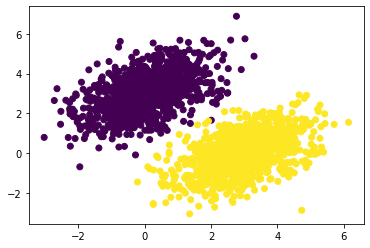

In [69]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()
# inputs[:,0] --> col=0 的所有row 
# inputs[:,1] --> col=1 的所有row
# c=targets[:, 0] 兩個顏色 c=color

In [70]:

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
c = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))
b.shape,W.shape

(TensorShape([1]), TensorShape([2, 1]))

In [71]:

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


Loss at step 0: 2.6833
Loss at step 1: 0.4354
Loss at step 2: 0.1652
Loss at step 3: 0.1258
Loss at step 4: 0.1139
Loss at step 5: 0.1059
Loss at step 6: 0.0989
Loss at step 7: 0.0925
Loss at step 8: 0.0867
Loss at step 9: 0.0814
Loss at step 10: 0.0766
Loss at step 11: 0.0721
Loss at step 12: 0.0681
Loss at step 13: 0.0644
Loss at step 14: 0.0610
Loss at step 15: 0.0579
Loss at step 16: 0.0551
Loss at step 17: 0.0525
Loss at step 18: 0.0502
Loss at step 19: 0.0480
Loss at step 20: 0.0461
Loss at step 21: 0.0443
Loss at step 22: 0.0426
Loss at step 23: 0.0411
Loss at step 24: 0.0398
Loss at step 25: 0.0385
Loss at step 26: 0.0374
Loss at step 27: 0.0363
Loss at step 28: 0.0354
Loss at step 29: 0.0345
Loss at step 30: 0.0337
Loss at step 31: 0.0330
Loss at step 32: 0.0323
Loss at step 33: 0.0317
Loss at step 34: 0.0311
Loss at step 35: 0.0306
Loss at step 36: 0.0302
Loss at step 37: 0.0297
Loss at step 38: 0.0294
Loss at step 39: 0.0290


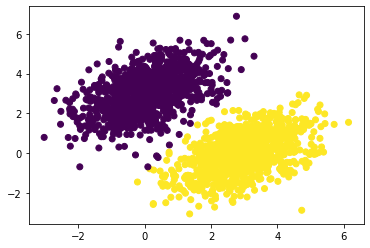

In [72]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

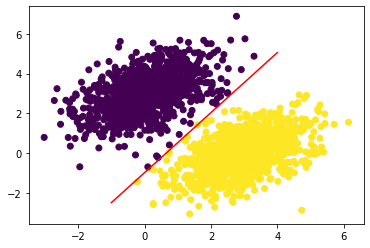

In [73]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [74]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [75]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [76]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [77]:
model = keras.Sequential([keras.layers.Dense(1)])


In [78]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [79]:

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [80]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
history.history

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 4.2789 - binary_accuracy: 0.4955
Epoch 2/5
16/16 [==============================] - 0s 995us/step - loss: 3.9752 - binary_accuracy: 0.4955
Epoch 3/5
16/16 [==============================] - 0s 957us/step - loss: 3.7254 - binary_accuracy: 0.4950
Epoch 4/5
16/16 [==============================] - 0s 978us/step - loss: 3.4890 - binary_accuracy: 0.4940
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 3.2625 - binary_accuracy: 0.4940


{'loss': [4.278935432434082,
  3.975240468978882,
  3.72542142868042,
  3.489018201828003,
  3.2624659538269043],
 'binary_accuracy': [0.49549999833106995,
  0.49549999833106995,
  0.4950000047683716,
  0.49399998784065247,
  0.49399998784065247]}

In [81]:

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.1713 - binary_accuracy: 0.9664 - val_loss: 0.0278 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0643 - binary_accuracy: 0.9650 - val_loss: 0.0448 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0705 - binary_accuracy: 0.9671 - val_loss: 0.0862 - val_binary_accuracy: 0.9800
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0700 - binary_accuracy: 0.9607 - val_loss: 0.0690 - val_binary_accuracy: 0.9700
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0727 - binary_accuracy: 0.9564 - val_loss: 0.0308 - val_binary_accuracy: 1.0000


In [82]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[0.22931719]
 [0.77056634]
 [0.74195725]
 [0.7361597 ]
 [0.88110423]
 [0.743553  ]
 [0.8900697 ]
 [0.64771795]
 [0.8007355 ]
 [0.9807328 ]]


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


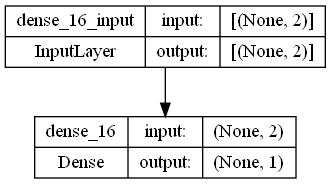

In [83]:
from tensorflow.keras.utils import plot_model
model.summary()

plot_model(model, 
    show_shapes= True,
    expand_nested=True
)
# plot_model??